In [ ]:
from IPython.display import HTML; HTML(f"""<style>{open("./styles/styles.css").read()}</style>""")

<center>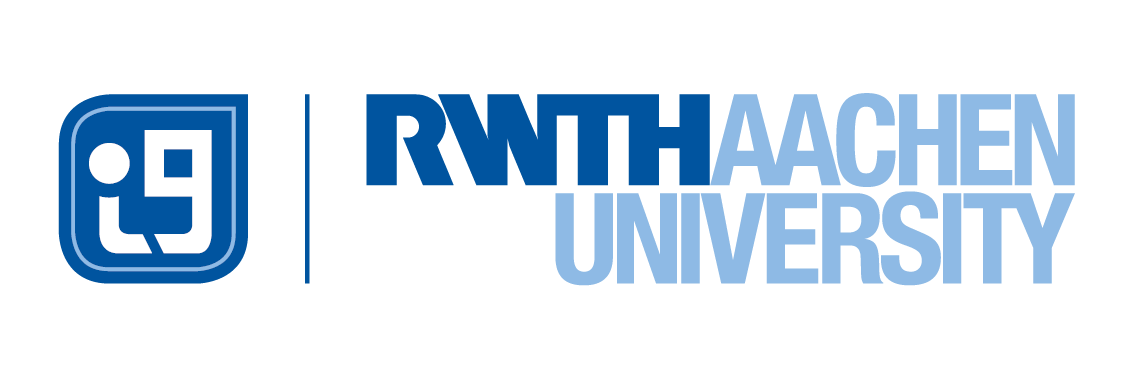</center>

<a id="top"></a>
# Functional Programming & Iterators

## Overview
### [Functional Programming](#functional)
* [`lambda` Functions](#lambdaFunctions)
* [List Comprehensions](#listComprehension)
* [Filter](#filter)
* [Filtering Data](#filteringData)
* [Cartesian Product](#cartesianProduct)
* [Joining Collections Using a Zip](#JoiningCollectionsUsingAZip)
* [The `reduce` Function](#theReduceFunction)
### [Iterators](#iterators)
* [Non-indexed Iterable](#nonindexedIterables)
* [Iterator objects](#iterator)
* [The module `itertools`](#theModuleItertools)
* [Generators](#generators)
  * [Fibonacchi Number Generator](#fibonacchiGenerator)
  * [Fibonacchi Class with Iterator](#fibonacchiIterator)
  * [Prime Generator](#primeGenerator)

<a name="functional"></a>
# Functional Programming

> **Reminder**: A function defnition starts with the keyword `def` followed by the function name and brackets `()` with optional parameters within, followed by `:` and the code as indented function block. 


However, there are also _function expressions_ which define _unnamed_ functions. Such functions can be assigned to variables and/or passed to other functions as argument. This is a key feature of _functional programming_. 

---
<a name="lambdaFunctions"></a>
## [`lambda` Functions](#top)
`lambda` functions are a very concise way to write a function. The syntax of a [lambda function](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) within `Python` is: 

```Python
lambda arguments: expressions
```

In [ ]:
f = lambda x: x*5 + 1

# similar "regular" function:
def regular_function(x):
    return x*5 + 1

In [ ]:
print('Lambda function assigned to f => f(2) =', f(2))
print('regular_function(2) =', regular_function(2))

The function expression can also be assigned to further variables, just like other objects or values.

In [ ]:
g = f
g(3)

This kind of **functional programing** can also be used as an input parameter to other functions. This is a nice abstraction mechanism, if we want to apply various functions on all items of a list:

In [ ]:
def apply_on_items(f, lst): # f is a function, lst a list
    result = list()
    for i in lst: # iterate through the items (i) of the given list (lst)
        result.append(f(i)) # apply f() on each item (i) of given list (lst)
    return result

f = lambda x: x*x # lambda function which squares every argument
g = lambda x: -x # lambda function which negates every argument
nums = [1, 2, 3, 4, 5, 6]
print("list =", nums)
print("sqrs =", apply_on_items(f, nums))
print("negs =", apply_on_items(g, nums))
print("doubles =", apply_on_items(lambda x: 2*x, nums)) # works directly without assignment

__Sidenote__:
> Actually, our `apply_on_items()` is the predefined `map( )`[(see link)](https://docs.python.org/3/library/functions.html#map) function, which applies a given function on all items of an iterable:

In [ ]:
list(map(f, nums))

In [ ]:
list(map(g, nums))

In [ ]:
list(map(lambda x: 2*x, nums))

>**Note:** The `map` function does not return a list but a "mapping object". Therefore, it has to be converted into a list.

In [ ]:
l = [1, 2, 3, 4, 5, 6]
print(map(lambda x: 2*x, l))
print(list(map(lambda x: 2*x, l)))

---
<a id="listComprehension"></a>
## [List Comprehensions](#top)

Now with `lambda` functions and the functional programming style, we have an elegant way to __construct new lists in a very concise way__ as they offer a shorter syntax.

In [ ]:
my_list = [2, 6, 5, 4, 66, 9, 100, 55, 4, 6, 4, 2] # some random numbers for demo

[2 * x for x in my_list]

This is equivalent to:

In [ ]:
new_list = []
for x in my_list:
    new_list.append(2*x)
new_list

... or equivalent to using the built-in `map( )` function:

In [ ]:
list(map(lambda x: 2*x, my_list))

A typical list comprehension uses the `range` class as the input `iterable`, e.g. to construct a list of the powers of two:

In [ ]:
[2**x for x in range(11)]   # for x in 0..10: 2**x

In [ ]:
[round(c*5/9+32,1) for c in range(0,35)]   # range of temperatures in Fahrenheit

We can also built multi-dimensional data structures with comprehensions. To build a 2d matrix `[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]` we construct three rows with four incrementing numbers. THe frist row starts from 1..4, the second from 5..8 (which is 1..4 adding 4 to each item), the third from 9..12, equally to 1..4 adding 8 to each number):

In [ ]:
matrix = [[i+j*4 for i in range(1,5)] for j in range(3)]
matrix

If we want to **transpose** a matrix, it is concisely done by a nested list comprehension: each row in the transposed matrix starts with the numbers of the first row in the original matrix etc.:

In [ ]:
[[row[i] for row in matrix] for i in range(4)]

<div class="learnmore">List comprehensions are often used in Python. <a href="https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions">Here</a> you can find more information about this concept.</div>

---
<a name="filter"></a>
## [Filter](#top)
The functional creation can also be combined with an `if`-clause to **filter** out values:

In [ ]:
my_list = [2, 6, 5, 19, 66, 9, 100, 55, 4, 6, 4, 2]

new_list = [2*x for x in my_list if x < 20] # only double elements of my_list which are smaller than 20 and do nothing with the others
new_list

The equivalent `for` loop to iteratively construct the same would be:

In [ ]:
new_list = []
for x in my_list:
    if x < 20:
        new_list.append(2*x)
new_list

Comprehensions work for all other collections as well, like sets or dictionaries:

In [ ]:
print("my_list = ", my_list)
set([x * x for x in my_list if x < 20])

In [ ]:
{c: round(c*1.8+32,1) for c in range(24,36)} # summer temperatures in USA

---
<a name="filteringData"></a>
## [Filtering Data](#top)

In general, we can filter a list by applying a **_predicate_** to each element of the list. A predicate is a function which takes a single argument, and returns a boolean value.

> `filter(p, X)` is equivalent to $\{ x : p(x) \; \forall x \in X \}$ in set-builder notation. For more information see the [docs](https://docs.python.org/3/library/functions.html#filter).


In [ ]:
lst = [-5, 2, 3, -10, 0, 1]
list(filter(lambda x: x > 0, lst)) # predicate ≙ lambda x: x > 0 => only positive values

This is the same as defining the filtered list comprehension. 

In [ ]:
[x for x in lst if x > 0]

We can combine both `filter()` and `map()` on other collections such `str`s or `set`s.

In [ ]:
set(filter(lambda x: x > 0, [-5, 2, 3, -10, 0, 1, 2, 3])) # predicate ≙ lambda x: x> 0 => only positive values

In [ ]:
s = "This is a text containing spaces."
print(list(filter(lambda x: x != ' ', s))) # put each character (except blanks) of the string s as an own element into a list and print this list
"".join((filter(lambda x: x != ' ', s))) # join all characters (except blanks) of the string s into a single string

> The `join()` [(see link)](https://docs.python.org/3/library/stdtypes.html#str.join) method of `str` takes an iterable of characters and joins them to a string. Thus, using the filter, we ignore all spaces.

---
<a name="cartesianProduct"></a>
## [Cartesian Product](#top)
The [Cartesian product](https://en.wikipedia.org/wiki/Cartesian_product) of two collections $X = A \times B$ can be expressed by using multiple `for` statements in a comprehension. 

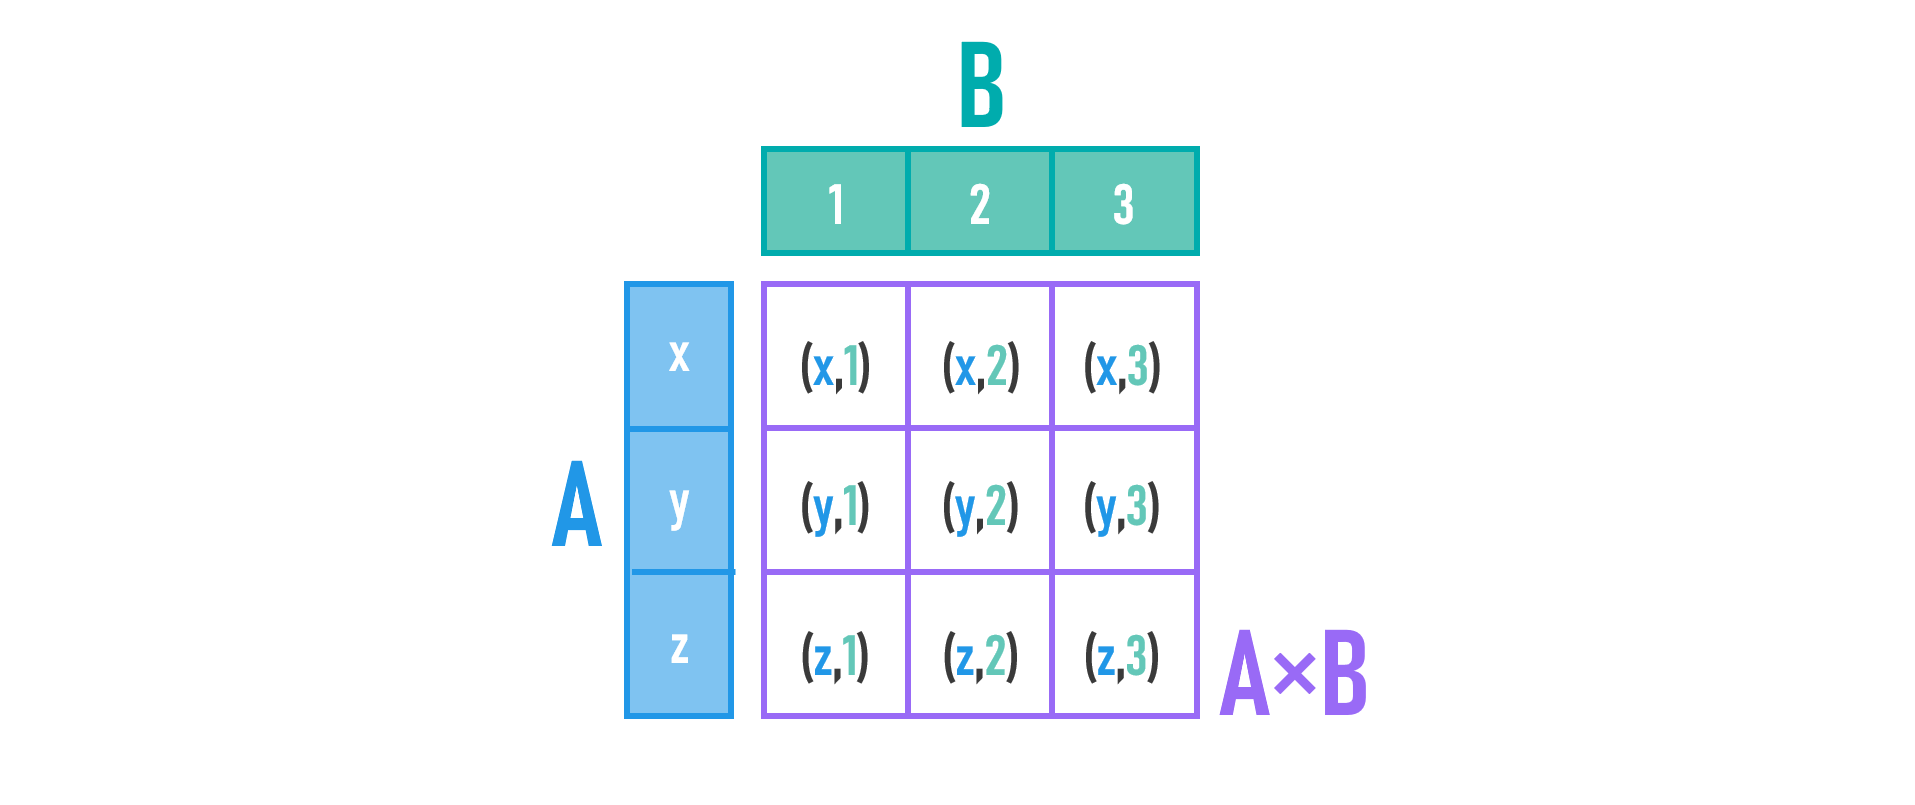

In [ ]:
A = ['x', 'y', 'z', 'x']
B = (1, 2)
{(a,b) for a in A for b in B} # set to filter out the second 'x'

>__Note:__ We used two different collections (iterables), a list and a tuple and for the result a set, to filter out any doubles.

Again, we can construct the same set of tuples with two nested for loops:

In [ ]:
s = set()
for a in A:
    for b in B:
        s.add((a, b))
s

---
<a name="JoiningCollectionsUsingAZip"></a>
## [Joining Collections Using a Zip](#top)

The Cartesian product pairs every combination of elements. If we want a 1-1 pairing we use the function `zip()` [(see link)](https://docs.python.org/3/library/functions.html#zip), which pairs values at the same position in each sequence.
Therefore:
* it can only be used with iterable sequences (not sets); and
* both collections must be of the same length (actually it works with the shortest)

The built-in zip function joins two (or more) lists to one list of tuples. The length of the tuple equals the lenght of the shortest list:

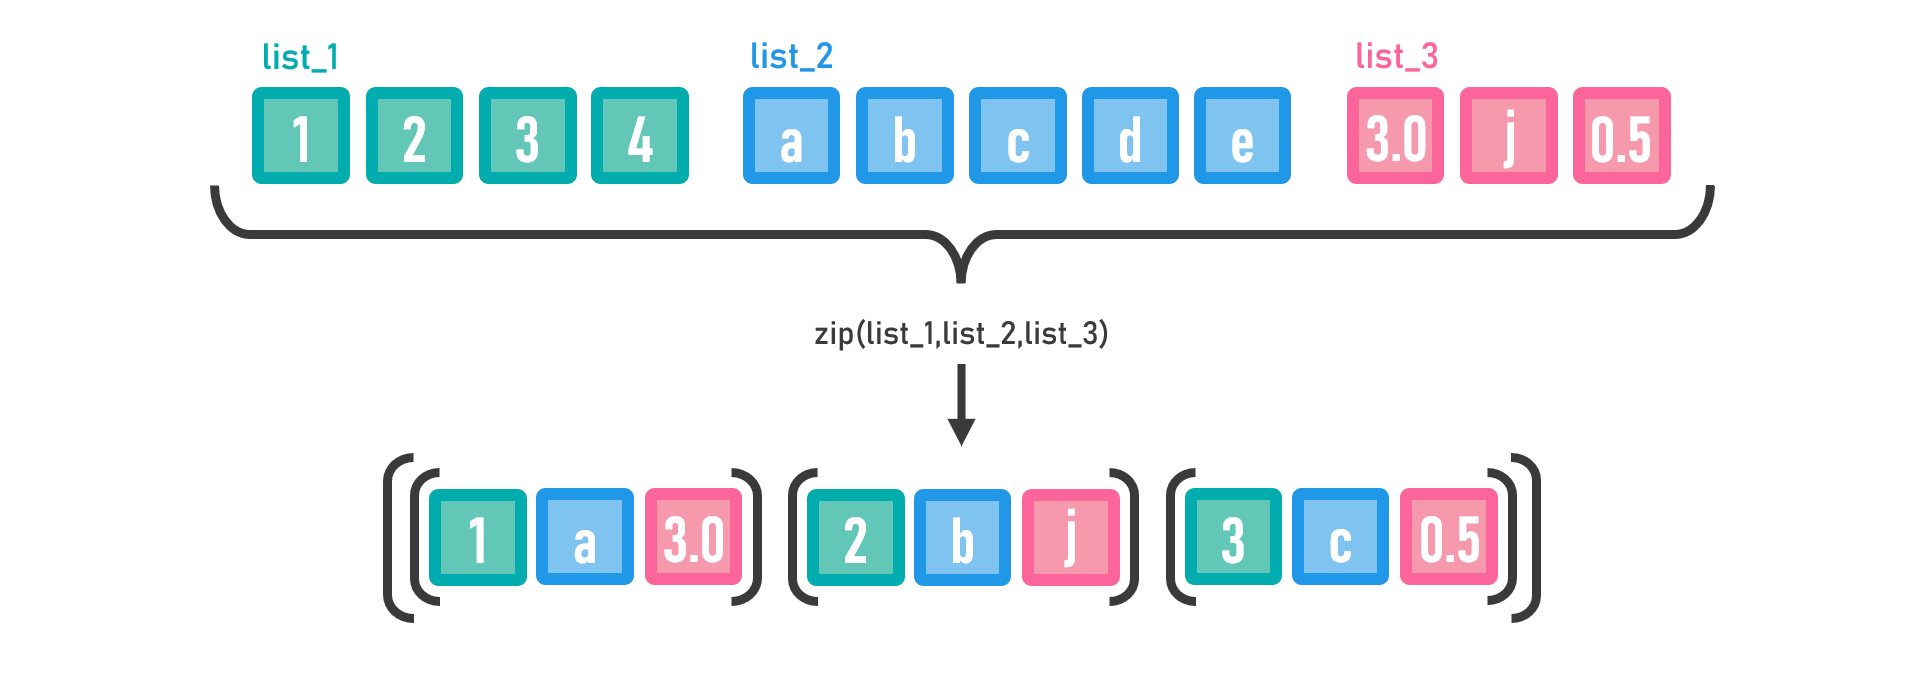

In [ ]:
list_a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # 10 items
list_b = ["a","b","c","d","e"] # 5 items
list_c = [True, True, False, True, False, True] # 6 items
one_list = list (zip (list_a, list_b, list_c))
print(one_list)
print(len(one_list))

In the opposite direction, to get three lists of out one list of 3d-tuples we can use list comprehensions

In [ ]:
list_a = [x[0] for x in one_list] # now of course only the first 5 elements of the original list
list_b = [x[1] for x in one_list]
list_c = [x[2] for x in one_list] # now of course only the first 5 elements of the original list
print(list_a)
print(list_b)
print(list_c)

Another way to acheive the same is using the `*` operator and assigning tuples to as many variables as the tuple dimension (three in our case).

In [ ]:
t_a, t_b, t_c = zip(*one_list) 
print("list of tuples:\n    ", one_list)
print("The items (tuples):\n     ", *one_list)
print ("Tuple of the first items of each tuple:\n     ", t_a)
print ("Tuple of the second items of each tuple:\n     ", t_b)
print ("Tuple of the second items of each tuple:\n     ", t_c)

---
<a name="theReduceFunction"></a>
## [The `reduce` Function](#top)

The `reduce()` function out of the library [_functools_](https://docs.python.org/3/library/functools.html) recursively applies a function to values over the entire list, resulting in a _single_ return value. So it _reduces_ the list to a single value:

In [ ]:
from functools import reduce
reduce(lambda x, y: x + y, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # sum 1 .. 10

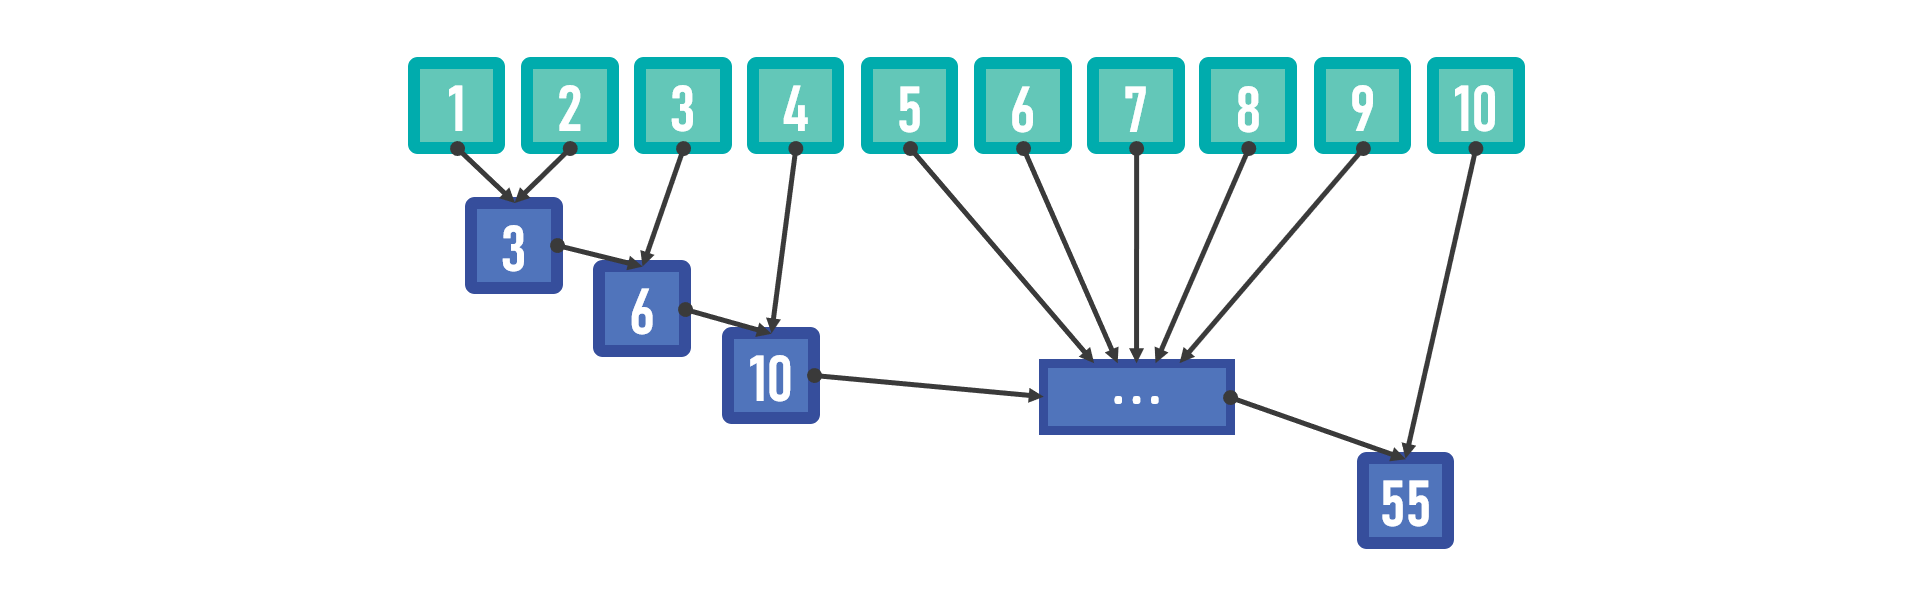

In [ ]:
from functools import reduce
reduce(lambda x, y: x * y, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # Prod 1 .. 10

In [ ]:
from functools import reduce
reduce(lambda x, y: x + y, ['A', 'a', 'c', 'h', 'e', 'n']) # concat strings

---
<a name="summary"></a>
## Functional Programming: Summary
Within this lecture you have been introduced to another concept for the implementation of functions, called *functional programming*, and the advantage this has over the implementation of "normal" functions. This includes in particular:
* [`lambda` Functions](#lambdaFunctions): define function expressions which can be assigned to variables or used as arguments for functions (functional abstraction).
* [List Comprehensions](#listComprehension): are concise ways of creating and specifying list (or other containers) 
  * [Filtering](#filter):
    * via `if`-clause
    * via `filter` function
* [Cartesian Product](#cartesianProduct): there are various ways to combine/join items from different lists/tuples/sets
  * [`zip` function](#JoiningCollectionsUsingAZip)
  * [`reduce` function](#theReduceFunction)
  
  
<div class="learnmore">If you do not know what error messages are indicating during your implementation, you can often solve this with the help of search engines. You can find corresponding examples of troubleshooting in an excursus notebook <a href="Excursion_Using_Search_Engines.ipynb">Excursion_Using_Search_Engines</a>. This should help you to deal with incomprehensible error messages in the future.</div>

<a name="iterators"></a>
# Iterators

We used the for-loop to iterate over `iterables` ("list-like" objects like lists, tuples, dict_keys, dict_items, ...) using the `for ... in` syntax:

In [ ]:
my_list = ['a', 'b', 'c', 42]

for x in my_list:
    print (x)

In [ ]:
str_1 = "Some text"
for c in str_1:
    print(c)

---
<a id="nonindexedIterables"></a>
## [Iterating over non-indexed Iterables](#top)
We can even iterate over sets and dictionaries, which have no defined sequence and cannot be addressed by indexing them: 

In [ ]:
german_population = {2022:84360000, 2021: 83240000, 2020: 83160000, 2019: 83166711, 2018: 83019213, 2017: 82792351, 2016: 82521653, 2015: 82175684}
print(german_population)

print('--------------------------------\niterate over keys in for loop:')
# for loop iterates over the keys of the dictionary:
for year in german_population.keys():   # many times .keys() is not explicitly called
    print(year, end=' - ')

As we already know, we can also iterate over the values of an dictionary:

In [ ]:
print(type(german_population.values()))
print('--------------------------------\niterate over values in for loop:')
# for loop iterates over the keys of the dictionary:
for population in german_population.values():
    print(population, end=' - ')

Or, as we have used it many times, iterating over the (key, value) pairs:

In [ ]:
print(type(german_population.items()))
print('--------------------------------\niterate over tuples in for loop:')
# for loop iterates over the keys of the dictionary:
for year, pop in german_population.items():
    print(f'In {year}, Germany had {pop:_d} inhbitants.')

> __Note__: Newer Versions of Python do indeed guarantee that iterating over a dictionary returns items in the same order in which they were inserted. This however is more of an _implementation detail_ and should not be relied on - _conceptionally_, dictionaries are generally considered unordered.

And finally this also works with sets. As you can see, there is some 'magic' sequence of items:

In [ ]:
fruits = {'banana', 'pineapple', 'orange', 'grapefruit', 'kiwi'}
print(fruits)

print('--------------------------------\niterate over set elements in for loop:')
for f in fruits:
    print(f)

---
<a id="iterator"></a>
## [Iterator object](#top)

What happens internally is, that an `iterator` __object__ is created. Calling the `next()` function on the iterator object, returns the *current* item and advances the internal *cursor* (referencing the current item) one position. Calling `next()` after the last item has been returned raises the `StopIteration` exception. This exception is handled by the interpreter when executing a for-loop.

The built-in function `iter()` creates such an iterator object on an iterable.

In [ ]:
it = iter(my_list)
print(next(it))
print(next(it))
print(next(it))
print(next(it))
print(next(it))

So the `for` loop from above is internally executed with an iterator object and handling the `StopIteration` exception:

In [ ]:
it = iter(my_list)
try:
    while True:
        print(next(it))
except StopIteration:
    print(">>> ok, we are through. No more elements to iterate. <<<")

---
<a id="theModuleItertools"></a>
## [The `itertools` module](#top)

In the day-to-day reality of _Python_ programming, an overwhelmingly large part of your iterator needs will most likely be served not by implementing your own, but rather by using and combining ones found in the very handy standard library module called [`itertools`](https://docs.python.org/3/library/itertools.html).

In [ ]:
import itertools

Imagine we read a large file that has a header line, followed by a sequence of one interesting line and one uninteresting line, plus some additional lines at the tail end we do not need in our further processing. We might filter out the interesting lines using _slicing syntax_ like so:

In [ ]:
hypothetical_file = ['header', 'good_line', 'boring line', 'good_line', 'boring_line', 'good_line', 'boring_line', 'stuff', 'stuff']
for line in hypothetical_file[1:7:2]:
    print(line)

The problem with this approach is that this requires us to load our entire file into memory as a `list` to use slicing syntax. Depending on the size of that file, that is not feasible. Thankfully, `itertools` provides an _iterator_ equivalent called `islice`, which we can use to achieve the same effect without resorting to loading everything into a list first:

In [ ]:
for line in itertools.islice(hypothetical_file, 1, 7, 2):
    print(line)

Similarly, we might want to iterate over two (or more) `iterables` in sequence. Rather than joining them into a new sequence first, using CPU cycles and memory, we can create an `iterator` that iterates over the items of the first sequence, then goes on with the second and so forth by using a `chain`:

In [ ]:
first_list = ['a', 'b', 'c']
second_list = ['d', 'e']

for item in itertools.chain(first_list, second_list):
    print(item)

If rather than a fixed number of `iterables` we have an `iterable` of `iterables`, we can create a `chain` like so:

In [ ]:
list_of_lists = [[1, 2], [3, 4], [5, 6]]

for item in itertools.chain.from_iterable(list_of_lists):
    print(item)

Another very useful `iterator` is `cycle` - it _infinitely_ loops over the `iterable` passed to it as an argument. It is particularly useful in combination with `zip`, which we have already seen:

In [ ]:
passengers = ['Alice', 'Bob', 'Charlotte', 'Danny', 'Eve']

for seat_assignment in zip(passengers, itertools.cycle(['left', 'right'])):
    print(seat_assignment)

<div class="learnmore">Whenever you need to iterate over one or more `iterable` in a slightly unusual way, it's always worth checking the <a href="https://docs.python.org/3/library/itertools.html">documentation</a> of <b>itertools</b> first - most likely it's already got you covered!</div>

---
<a id="generators"></a>
## [Generators](#top)
We can also create an iterating **function** using the keyword `yield`. When reaching `yield` the iterator function (then called **generator**) returns the computed value and yields at that statement, until the function is called the next time. All variables keep their value for the next run:

In [ ]:
def squares():
    # compute all the squares ... forever
    i = 0
    while True:
        i = i + 1
        yield i*i # return square( i ) and wait here for the next call to the function

>__Note:__ The function does not contain a `return` statement. Instead, the resulting values are returned by `yield`. 

With this generator, we can produce as many square numbers as we need in some scenario:

In [ ]:
x = squares()
print(next(x))
print(next(x))
print(next(x))
print(next(x))
# ... go on as long as you wish

With a generator you can organize loops, to iterate over a certain number of computed values. The computation is only executed as far, as needed in the loop, instead of producing a data structure with a fixed amount of pre-calculated values (such as `range(..)`. This is called __lazy evaluation__, another well known functional programming concept:

In [ ]:
for x in squares(): # returns and yields for each element
    print(x)
    if x >= 36:
        break

In our example, the for loop is internally executed by calling the `next()` function until we explicitly break. This is necessary, because there is no `StopIteration`-Exception, thus the loop would go on 'eternally':

In [ ]:
for x in squares(): # returns and yields for each element
    print(x)
    if x >= 1234:
        break

<a id='fibonacchiGenerator'></a>
### [Fibonacchi number generator](#top)
With this kind of lazy evaluation, we can compute fibonacchi numbers exactly so far as we need it in a certain situation.  

In [ ]:
def fib(max):
    '''Generator function for Fibonacci numbers.'''
    a, b = 1, 1
    while a < max:
        yield a            # return val and wait for next call
        print('fib:', a)   # for demo
        a, b = b, a + b    # compute next value

# test Generator function
for n in fib( 10000 ):
    print( 'loop:', n, end=' - ')
    # demo: do not compute further 
    if n > 300:
        break
print( '--|' )

>__Note:__ We called the generator function `fib(10000)` , but never computed that large numbers. We only use the generator function, until it produces a value > 300.

Alternatively, we can create a class Fibonacchi, which offers its own iterator object:

<a id='fibonacchiIterator'></a>
### [Fibonacchi class with iterator](#top)

In [ ]:
class Fib:
    '''Class returning iterator object(s) that yield(s) numbers in the Fibonacci sequence up to max'''
    def __init__(self, max):
        self.max = max

    def __iter__(self):
        self.a = 1
        self.b = 1
        return self

    def __next__(self):
        fib = self.a
        if fib > self.max:
            raise StopIteration
        self.a, self.b = self.b, self.a + self.b
        return fib
    
    # represent the object as a string to be printable
    def __repr__ (self):
        return "Fibo up to: " + str(self.max) 

fib = Fib(1000000) # theoretically values up to 1.000.000
# print( fib.__class__ )
print( fib.__doc__ )
# print( "Fib directory: ", dir( fib ) )
print( fib )

for n in Fib( 5000 ):     # unnamed Fib iterator instance up to 5000
    print( n, end=' - ')
print( '--|')

---

<a id='primeGenerator'></a>
### [Prime generator](#top)
One typical Pythonian example is generating prime numbers:

In [ ]:
def gen_primes(N):
    '''Generate primes up to N'''
    primes = set()
    for n in range(2, N):
        if all(n % p > 0 for p in primes):
            primes.add(n)
            yield n

print(*gen_primes(1000), sep=', ', end='.')

In this example, the `*`-Operator calls the `gen_primes( )`-function again and again, until it ends without yield. Thus it returns all the primes up to 1.000 as an unpacked tuple, which are then printed.

<div class="learnmore">See many more <a href="https://treyhunner.com/2018/10/asterisks-in-python-what-they-are-and-how-to-use-them/">uses of the `*`-operator</a>.</div>

---
# [Summary](#top)
In this lesson, you learned

+ what iterators are
+ how to implement your own
+ how use the `itertools` module
+ how implement lazy-evaluated functions

In the [next lecture](07_FilesAndExceptions.ipynb) you will learn how to work with files and exceptions.